# UX Diagram Agent (Google ADK Version)

__Author:__ Leslie A. McFarlin, Principal UX Architect

In [1]:
# General imports
import os
import sys
import uuid
from dotenv import load_dotenv
from google.genai import types

# Diagramming
from IPython.display import Image, display
from PIL import Image as im
from mermaid import Mermaid
import matplotlib.pyplot as plt

In [2]:
# Custom modules
sys.path.append("lib")

# Autoreload
%load_ext autoreload
%autoreload 2

# custom modules
from agent_diagram import mm, builder_tool_graph
from lib.config import APP_NAME
from lib.agents.taskflow_agent import agent_task_builder, session_service, memory_service, runner
from lib.tools.support import run_session, chat

App name mismatch detected. The runner is configured with app name "UX_TASKFLOW_BUILDER_APP", but the root agent was loaded from "C:\Users\lesli\OneDrive\Desktop\Python Projects\ux_diagram_agent\.venv\Lib\site-packages\google\adk\agents", which implies app name "agents".


## How This Agent Works

This agent takes natural language from a user and converts into a JSON that is then translated by tools into a diagram. That diagram is created via Mermaid.

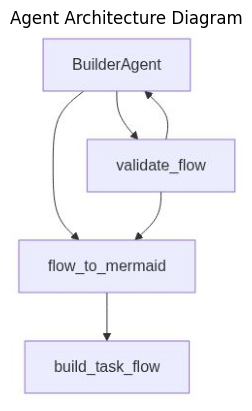

In [3]:
# Draw the Agent Architecture
mm(builder_tool_graph)

In [4]:
# USER_ID and SESSION_ID
USER_ID = str(uuid.uuid4())
SESSION_ID = str(uuid.uuid4())

I will define two local helper functions next to facilitate communications with the LLM. With this function, a user can interact directly with the agent from the notebook without having to pass all of the details for ```run_session()``` each time.

__How to Use Chat__
1. Construct an input string. Example:
   ```
   # Input string
   user_input = """
   Create a simple user login flow. It should start with users landing on the login page.
   Then users should input either a username or email, and a password.
   If credentials are correct, the user logs into the system. If the credentials are incorrect, display an error.
   """
   ```
2. Pass the input string to chat. Example:
```
await chat(user_input)
```

This approach minimizes the load on the user, improving the user experience for Agent interactions via notebook.

In [ ]:
# Wrapper for conversations
async def chat(query: str):
    '''
    Async wrapper for chat functionality to avoid always passing run_session arguments
    
    :param query: user inputs to the LLM agent
    :type query: str
    '''
    await run_session(
        runner_instance=runner,
        user_queries=query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)

In [6]:
# Test query
test_query = """
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.
"""

# To start, just use await run_session()
await run_session(
        runner_instance=runner,
        user_queries=test_query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)


##### Session: e8db6927-c136-41c0-a4c7-9cf2240351d6
Session created for: UX_TASKFLOW_BUILDER_APP, cd9fffe0-e2de-4600-ad93-06dc7a7b2d6e, e8db6927-c136-41c0-a4c7-9cf2240351d6

User > 
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

[2025-11-27T08:36:01] [query_start] user_id=cd9fffe0-e2de-4600-ad93-06dc7a7b2d6e session_id=e8db6927-c136-41c0-a4c7-9cf2240351d6 query=
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

Model > I can build that flow for you. Just to confirm, after a failed login, should the user be presented with an option to retry, or should the flow simply end there?
[2025-11-27T08:36:04] [query_complete] user_id=cd9fffe0-e2de-4600-ad

In [7]:
# Follow up chats - Uncomment and update if needed.
user_input = """
Yes, include a "forgot password" path.
After a failed login, display an error and allow for up to 3 retry attempts. Do a lockout after 3 attempts.
"""

await chat(user_input)

NameError: name 'runner' is not defined